# Basic classification: Classify images of clothing

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


## Import the Fashion MNIST dataset

This guide uses the
Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist)
dataset which contains 70,000grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), asseen here

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels), (test_images,test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in thetraining set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

#### Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

#### Each label is an integer between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will seethat the pixel values fall in the range of 0 to 255:

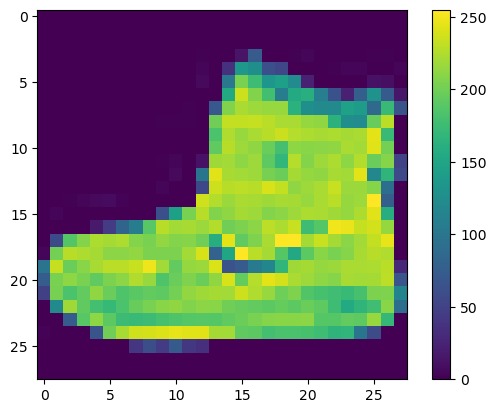

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by255. It's important that the training setand the testing set be preprocessed in the same way:

In [14]:
train_images = train_images/255.0

test_images=test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

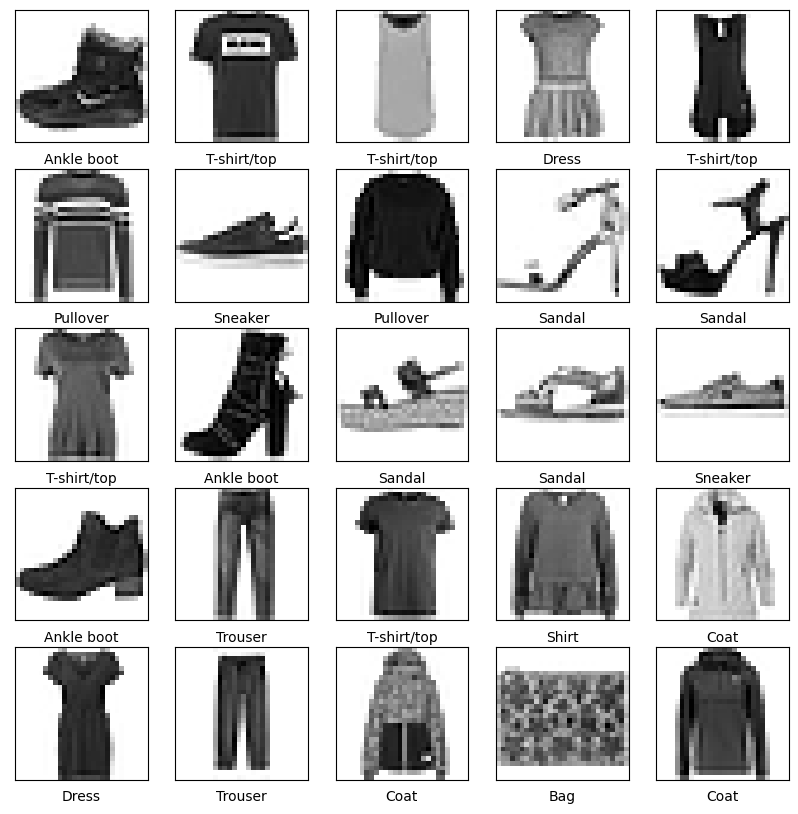

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers

The basic building block of a neural network is the
layer (https://www.tensorflow.org/api_docs/python/tf/keras/layers)
.Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for theproblem at hand.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to convert 2D image to 1D array
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer with 128 units and ReLU activation function
    tf.keras.layers.Dense(10)  # Dense layer with 10 units (output layer)
])

The first layer in this network, tf.keras.layers.Flatten , transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer asunstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second(and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's
compile
(https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
step:

<li> Loss function (https://www.tensorflow.org/api_docs/python/tf/keras/losses)
—This measures how accurate the modelis during training. You want to minimize this function to "steer" the model in the right direction. <br>

<li> Optimizer (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
—This is how the model is updated basedon the data it sees and its loss function. <br>

<li> Metrics (https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
—Used to monitor the training and testingsteps. The following example uses
accuracy, the fraction of the images that are correctly classified. <br>

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train the model

Training the neural network model requires the following steps:
<ol>
<li> Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
<li>The model learns to associate images and labels.
<li> You ask the model to make predictions about a test set—in this example, the test_images array.
<li> Verify that the predictions match the labels from the test_labels array.
</ol>

## Feed the model

To start training, call the model.fit (https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so calledbecause it "fits" the model to the training data:

In [20]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10,  # Number of epochs for training
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4993 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

## Evaluate accuracy


Next, compare how the model performs on the test dataset:

In [22]:
test_loss, test_acc = model.evaluate(
    test_images,
    test_labels,
    verbose=2
)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3500 - accuracy: 0.8785 - 436ms/epoch - 1ms/step

Test accuracy: 0.8784999847412109


## Make predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert themodel's linear outputs—
logits (https://developers.google.com/machine-learning/glossary#logits)
—to probabilities, whichshould be easier to interpret.

In [23]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [24]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 901us/step


In [25]:
predictions[0]

array([3.2121090e-09, 3.0934784e-12, 7.0774309e-10, 1.8047094e-12,
       2.7819197e-11, 2.4764452e-04, 4.4444315e-09, 3.8702064e-03,
       2.9095137e-09, 9.9588215e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each ofthe 10 different articles of clothing. You can see which label has the highest confidence value:

In [26]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label showsthat this classification is correct:

In [27]:
test_labels[0]

9

## Graph this to look at the full set of 10 class predictions.

In [28]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Verify predictions

With the model trained, you can use it to make predictions about some images. <br> 
Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect predictionlabels are red. The number gives the percentage (out of 100) for the predicted label

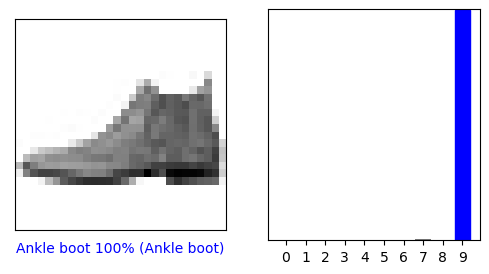

In [29]:
i = 0
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

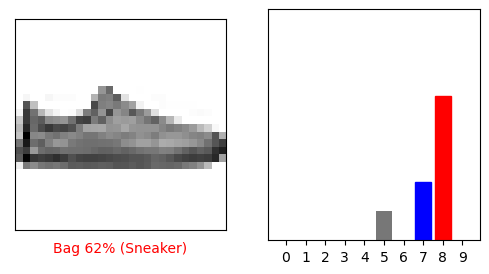

In [30]:
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

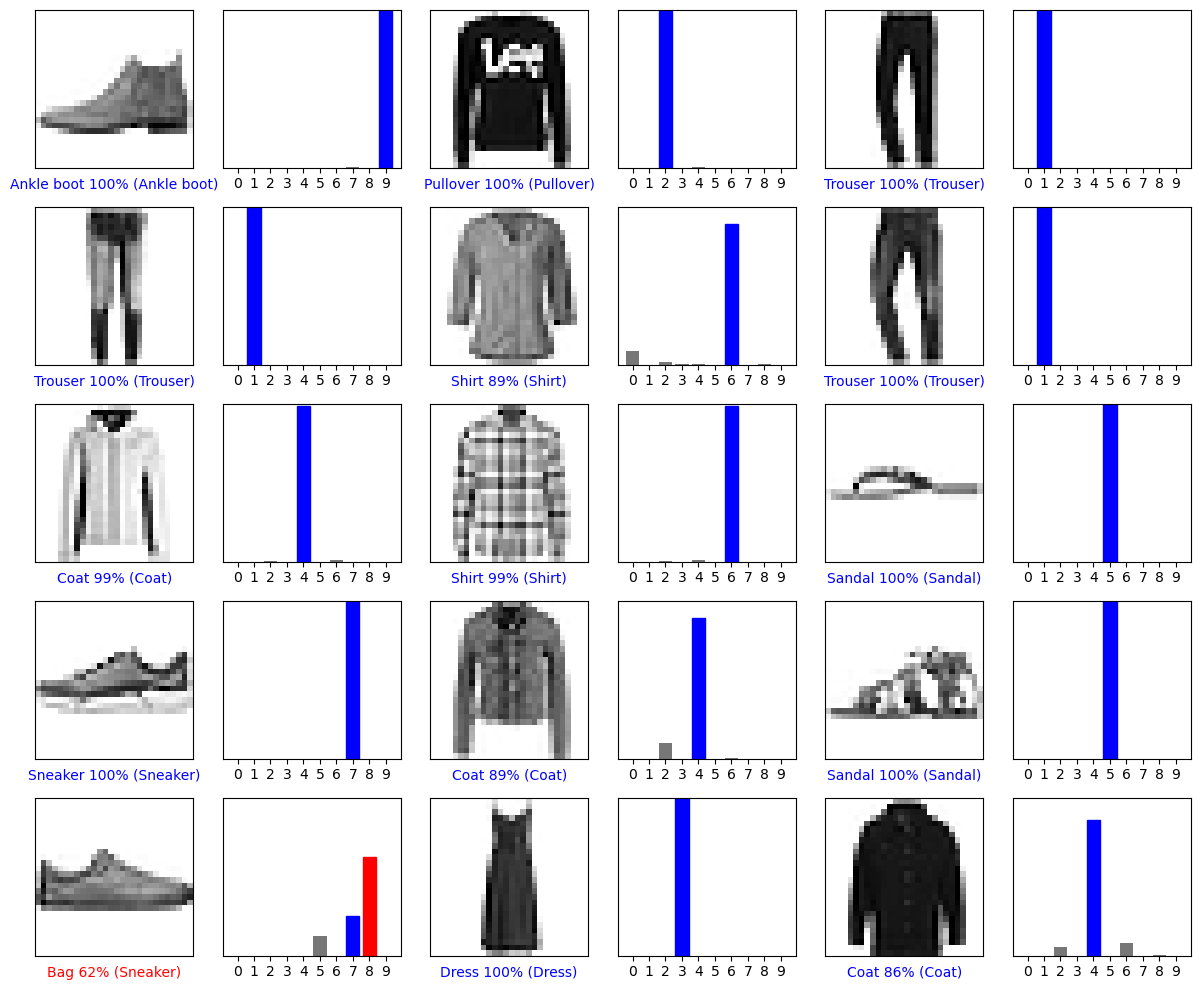

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [32]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


Now predict the correct label for this image:

In [33]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 45ms/step
[[6.8583608e-06 3.5223194e-14 9.9629539e-01 2.8845029e-16 3.6626239e-03
  3.4806275e-13 3.5128960e-05 1.0069128e-16 4.4245421e-09 1.8986620e-12]]


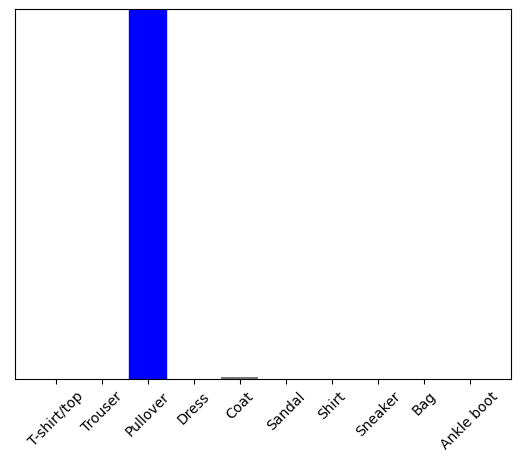

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions forour (only) image in the batch

In [35]:
np.argmax(predictions_single[0])

2

### And the model predicts a label as expected